In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy import stats
from sklearn.tree import export_graphviz

import graphviz


from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [7]:
df = pd.read_csv("BOSTON_HOUSING.csv", engine='python')
df_y = df['MEDV']
df_x = df.drop('MEDV', axis=1, inplace=False)
df

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.400000,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67
502,20.600000,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08
503,23.900000,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64
504,22.000000,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48


In [8]:
df.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000
50%,21.200001,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999
max,50.000000,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64e49cf110>,
      dtype=object)

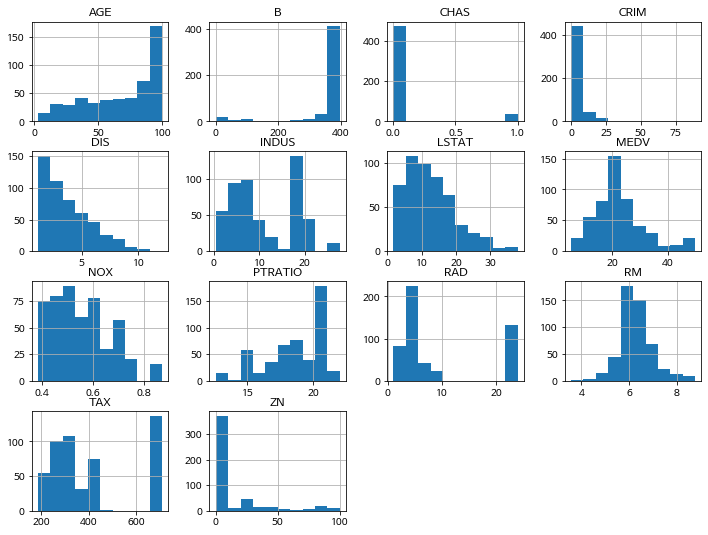

In [9]:
df.hist(figsize=(12,9))

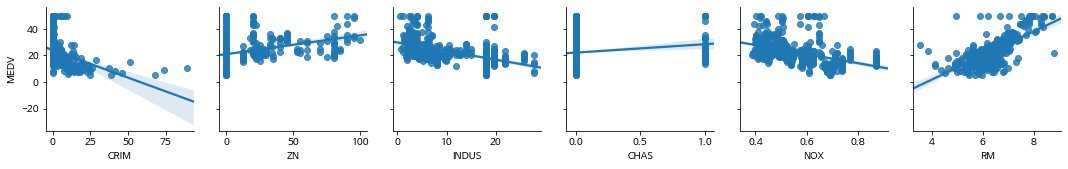

In [10]:
sns.pairplot(df, y_vars="MEDV", x_vars=df_x.columns[:6],kind='reg')

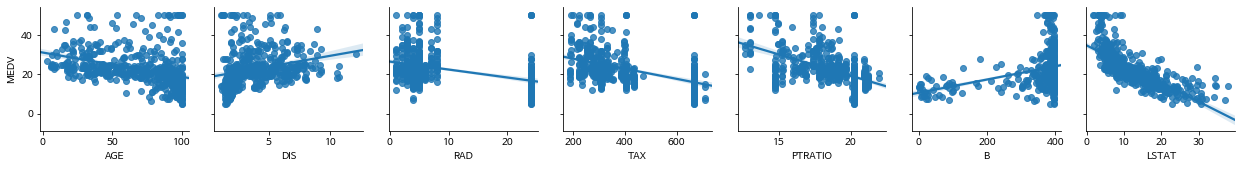

In [11]:
sns.pairplot(df, y_vars="MEDV", x_vars=df_x.columns[6:],kind='reg')


In [12]:
df.corr().round(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000,-0.388,0.360,-0.484,0.175,-0.427,0.695,-0.377,0.250,-0.382,-0.469,-0.508,0.333,-0.738
CRIM,-0.388,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456
ZN,0.360,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413
INDUS,-0.484,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604
CHAS,0.175,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054
NOX,-0.427,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591
RM,0.695,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614
AGE,-0.377,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602
DIS,0.250,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497
RAD,-0.382,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489


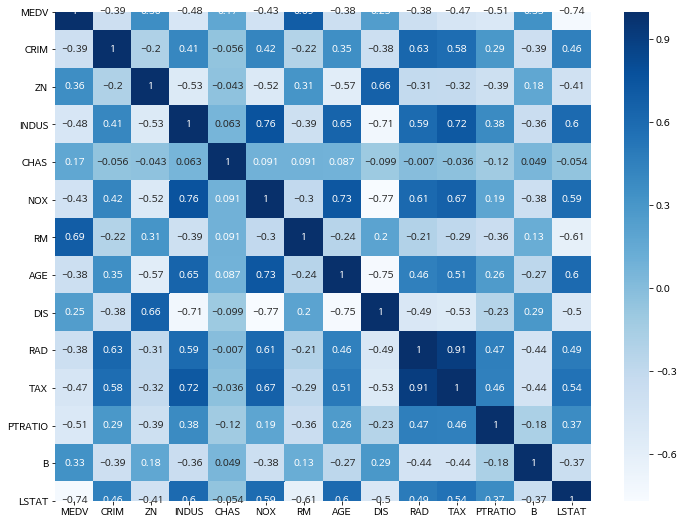

In [40]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr().round(3), annot=True, cmap='Blues')

# 강조망권

In [36]:
df1 = pd.DataFrame({"sample": df.MEDV[df['CHAS'] == 0]})
df2 = pd.DataFrame({"sample": df.MEDV[df['CHAS'] == 1]})

print(stats.shapiro(df1)) #0.06 -> p값 0.05이상이니까 정규성 만족
print(stats.shapiro(df2)) #0.03 -> p값 0.05미만이니까 정규성 만족

print(stats.levene(df1['sample'], df2['sample'])) # p값 0.05이상이니까 등분산성 만족 -> equal_var 값 = True

t_result = stats.ttest_ind(df1,df2, equal_var = True)
t,p = t_result.statistic, t_result.pvalue
th = stats.t.ppf(0.025,19)
print(t,p, th) 
#차이가 있다고 나오긴함. 

(0.9282605051994324, 3.113930960958397e-14)
(0.8359232544898987, 0.00011230883683310822)
LeveneResult(statistic=4.590342071304883, pvalue=0.03263097878646009)
[-3.99643748] [7.39062277e-05] -2.0930240544082634


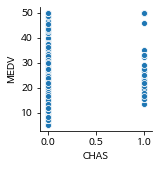

In [44]:
sns.pairplot(df, y_vars="MEDV", x_vars='CHAS')

In [58]:
df[df['CHAS']==1].count()

MEDV       35
CRIM       35
ZN         35
INDUS      35
CHAS       35
NOX        35
RM         35
AGE        35
DIS        35
RAD        35
TAX        35
PTRATIO    35
B          35
LSTAT      35
dtype: int64

In [53]:
df[(df['CHAS']==0) & (df['MEDV'] > 40)]

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
98,43.799999,0.08187,0.0,2.89,0,0.4450,7.820,36.900002,3.4952,2,276,18.000000,393.529999,3.57
157,41.299999,1.22358,0.0,19.58,0,0.6050,6.943,97.400002,1.8773,5,403,14.700000,363.429993,4.59
161,50.000000,1.46336,0.0,19.58,0,0.6050,7.489,90.800003,1.9709,5,403,14.700000,374.429993,1.73
166,50.000000,2.01019,0.0,19.58,0,0.6050,7.929,96.199997,2.0459,5,403,14.700000,369.299988,3.70
186,50.000000,0.05602,0.0,2.46,0,0.4880,7.831,53.599998,3.1992,3,193,17.799999,392.630005,4.45
195,50.000000,0.01381,80.0,0.46,0,0.4220,7.875,32.000000,5.6484,4,255,14.400000,394.230011,2.97
202,42.299999,0.02177,82.5,2.03,0,0.4150,7.610,15.700000,6.2700,2,348,14.700000,395.380005,3.11
203,48.500000,0.03510,95.0,2.68,0,0.4161,7.853,33.200001,5.1180,4,224,14.700000,392.779999,3.81
204,50.000000,0.02009,95.0,2.68,0,0.4161,8.034,31.900000,5.1180,4,224,14.700000,390.549988,2.88
224,44.799999,0.31533,0.0,6.20,0,0.5040,8.266,78.300003,2.8944,8,307,17.400000,385.049988,4.14


In [52]:
df[(df['CHAS']==1) & (df['MEDV'] > 40)]

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
162,50.0,1.83377,0.0,19.58,1,0.6050,7.802,98.199997,2.0407,5,403,14.700000,389.609985,1.92
163,50.0,1.51902,0.0,19.58,1,0.6050,8.375,93.900002,2.1620,5,403,14.700000,388.450012,3.32
282,46.0,0.06129,20.0,3.33,1,0.4429,7.645,49.700001,5.2119,5,216,14.900000,377.070007,3.01
283,50.0,0.01501,90.0,1.21,1,0.4010,7.923,24.799999,5.8850,1,198,13.600000,395.519989,3.16
369,50.0,5.66998,0.0,18.10,1,0.6310,6.683,96.800003,1.3567,24,666,20.200001,375.329987,3.73
370,50.0,6.53876,0.0,18.10,1,0.6310,7.016,97.500000,1.2024,24,666,20.200001,392.049988,2.96
372,50.0,8.26725,0.0,18.10,1,0.6680,5.875,89.599998,1.1296,24,666,20.200001,347.880005,8.88
